In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('job.csv')
df.head()

,job_title,company_name,location,start_date,ctc,experience,posted
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago\n\n\nBe an early applicant
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     4596 non-null   object
 1   company_name  4596 non-null   object
 2   location      4596 non-null   object
 3   start_date    4596 non-null   object
 4   ctc           4596 non-null   object
 5   experience    4596 non-null   object
 6   posted        4596 non-null   object
dtypes: object(7)
memory usage: 251.5+ KB


In [4]:
df['posted'].value_counts()

posted
3 weeks ago                                 1326
1 week ago                                  1031
2 weeks ago                                  936
3 days ago                                   198
2 days ago                                   138
4 days ago                                   109
6 days ago                                   100
5 days ago                                    98
1 week ago\n\n\nBe an early applicant         84
3 weeks ago\n\n\nBe an early applicant        81
2 weeks ago\n\n\nBe an early applicant        78
1 day ago                                     74
Few hours ago                                 60
2 days ago\n\n\nBe an early applicant         49
3 days ago\n\n\nBe an early applicant         46
1 day ago\n\n\nBe an early applicant          29
4 days ago\n\n\nBe an early applicant         26
Just now\n\n\nBe an early applicant           26
Few hours ago\n\n\nBe an early applicant      23
Today                                         19
Today\n\n\nBe

In [5]:
df['posted'] = df['posted'].str.replace('\n\n\nBe an early applicant','')
df['min_ctc'] =df['ctc'].str.split('-').str[0].str.strip().str.replace('₹','').str.replace(',','')
df['max_ctc'] = df['ctc'].str.split('-').str[-1].str.strip().str.replace('₹','').str.replace(',','')
df[['min_ctc', 'max_ctc']] = df[['min_ctc','max_ctc']].apply(pd.to_numeric, errors='coerce')

In [6]:
df.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc
2014,Business Development Representative (BDR),CreditZilla,Mumbai,Starts Immediately,"₹ 3,00,000 - 5,00,000",0-5 years,1 week ago,300000.0,500000.0
723,Embedded Systems Engineer,AICAN Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",1-2 years,2 weeks ago,200000.0,300000.0
3794,Human Resources (HR) Associate,PayrollCloud Private Limited,Dehradun,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2 years,3 weeks ago,200000.0,300000.0
3664,Assistant Manager - Accounts & Taxation,Mindfree Business Consulting Private Limited,Noida,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2 years,3 weeks ago,200000.0,300000.0
4488,Java Developer,SANTO SYSTEMS PRIVATE LIMITED,Bangalore,Starts Immediately,"₹ 22,00,000 - 27,00,000",7-10 years,3 weeks ago,2200000.0,2700000.0


In [7]:
df['experience'] = df['experience'].str.replace('years','')
df['min_experience'] = df['experience'].str.split('-').str[0].str.strip()
df['max_experience'] = df['experience'].str.split('-').str[-1].str.strip()
df[['min_experience']].apply(pd.to_numeric, errors='coerce')


,min_experience
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4591,3.0
4592,2.0
4593,3.0
4594,3.0


In [8]:
df.tail()

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc,min_experience,max_experience
4591,PHP Developer,Unnati,Gurgaon,Starts Immediately,Competitive salary,3-5,3 weeks ago,NaN,NaN,3,5
4592,Software Developer,Unnati,Gurgaon,Starts Immediately,Competitive salary,2-10,3 weeks ago,NaN,NaN,2,10
4593,Social Media Marketing Manager,Unnati,Delhi,Starts Immediately,Competitive salary,3-4,3 weeks ago,NaN,NaN,3,4
4594,Graphic Designer,Unnati,Gurgaon,Starts Immediately,Competitive salary,3-6,3 weeks ago,NaN,NaN,3,6
4595,Digital Marketing Manager,Unnati,Delhi,Starts Immediately,Competitive salary,3-7,3 weeks ago,NaN,NaN,3,7


In [9]:
df['posted'].value_counts()

posted
3 weeks ago      1407
1 week ago       1115
2 weeks ago      1014
3 days ago        244
2 days ago        187
4 days ago        135
5 days ago        111
6 days ago        104
1 day ago         103
Few hours ago      83
Today              37
Just now           36
7 days ago         20
Name: count, dtype: int64

In [10]:
def convert_to_days(posted):
    if 'week' in posted:
        return int(posted.split()[0]) * 7
    elif 'days' in posted:
        return int(posted.split()[0])
    elif 'hour' in posted or 'Just now' in posted or 'Few hours ago' in posted or 'Today' in posted:
        return 0
    
    df['posted'] = df['posted'].apply(convert_to_days)

In [11]:
df.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc,min_experience,max_experience
4504,Accountant,Sanali Group | Office Spaces In Hyderabad | Fl...,Hyderabad,Starts Immediately,"₹ 4,60,000 - 6,00,000",4-6,3 weeks ago,460000.0,600000.0,4,6
3168,Associate Video Editor,Autonity,Bangalore,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2,2 weeks ago,300000.0,350000.0,0,2
1624,Full Stack Software Engineer Trainee,Prodeasy,Work from home,Starts Immediately,"₹ 3,50,000 - 5,00,000",0-5,4 days ago,350000.0,500000.0,0,5
1152,Content Writer,Netscape India Private Limited,Gurgaon,Starts Immediately,"₹ 2,00,000 - 2,40,000",0-2,2 weeks ago,200000.0,240000.0,0,2
2722,Telecaller,RG DZINE,Kolkata,Starts Immediately,"₹ 2,00,000",0-2,2 weeks ago,200000.0,200000.0,0,2


# Exploratory Data Analysis (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PC\AppData\Local\Temp\ipykernel_12640\1503091616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience', data=df, palette='viridis')


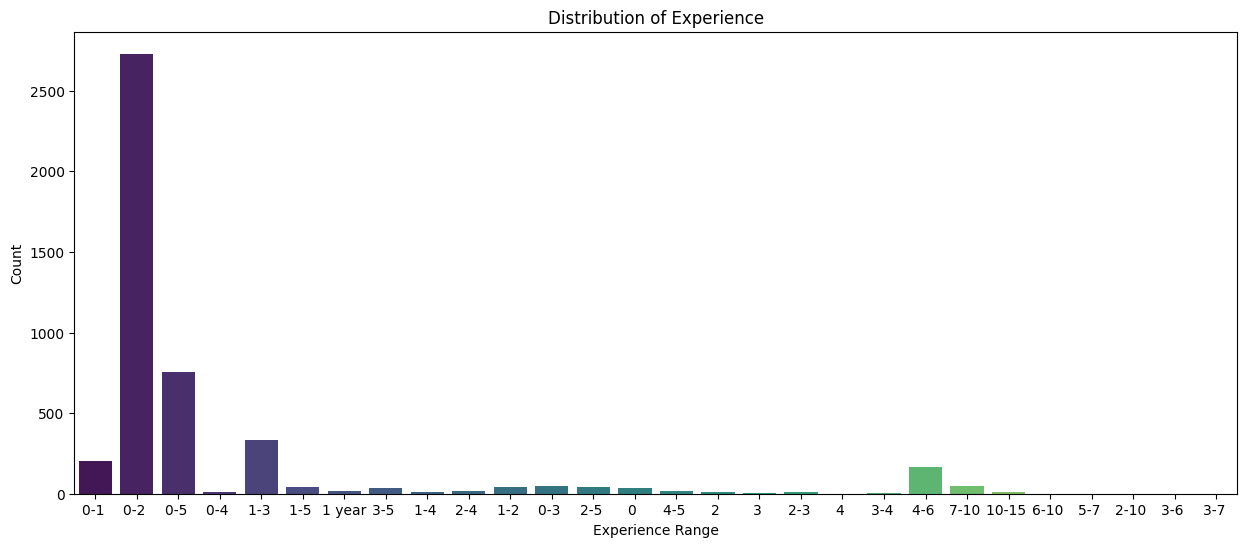

In [14]:
# Distribution of Experience
plt.figure(figsize=(15, 6))
sns.countplot(x='experience', data=df, palette='viridis')
plt.title('Distribution of Experience')
plt.xlabel('Experience Range')
plt.ylabel('Count')
plt.show()

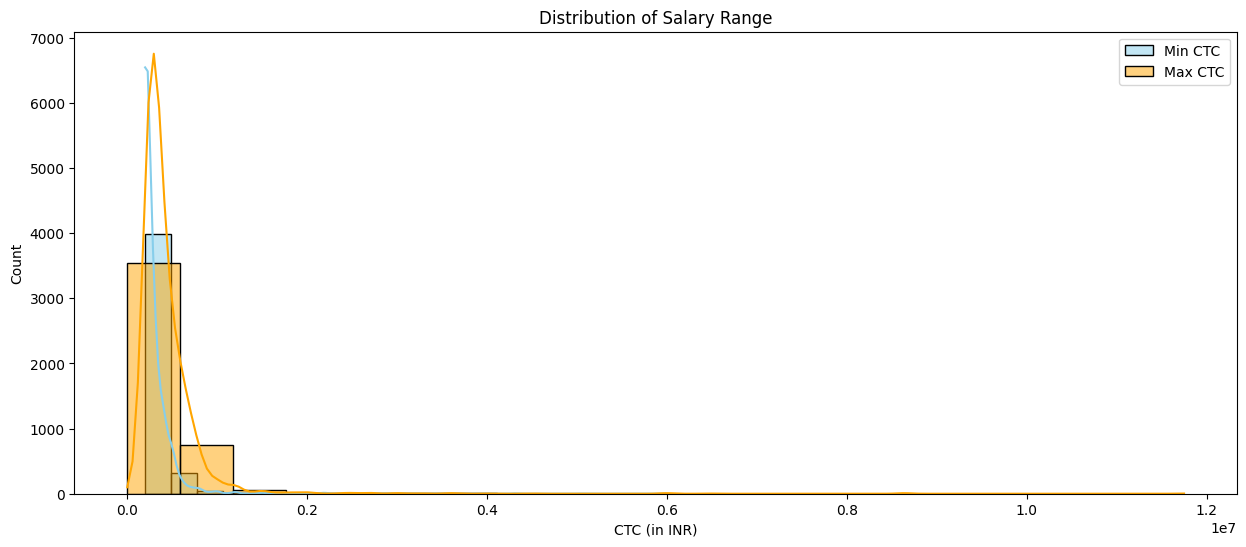

In [15]:
# Distribution of Salary Range
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='min_ctc', bins=20, kde=True, color='skyblue', label='Min CTC')
sns.histplot(data=df, x='max_ctc', bins=20, kde=True, color='orange', label='Max CTC')
plt.title('Distribution of Salary Range')
plt.xlabel('CTC (in INR)')
plt.ylabel('Count')
plt.legend()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12640\1816904751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_title', data=df, palette='muted', order=top_10_titles.index)


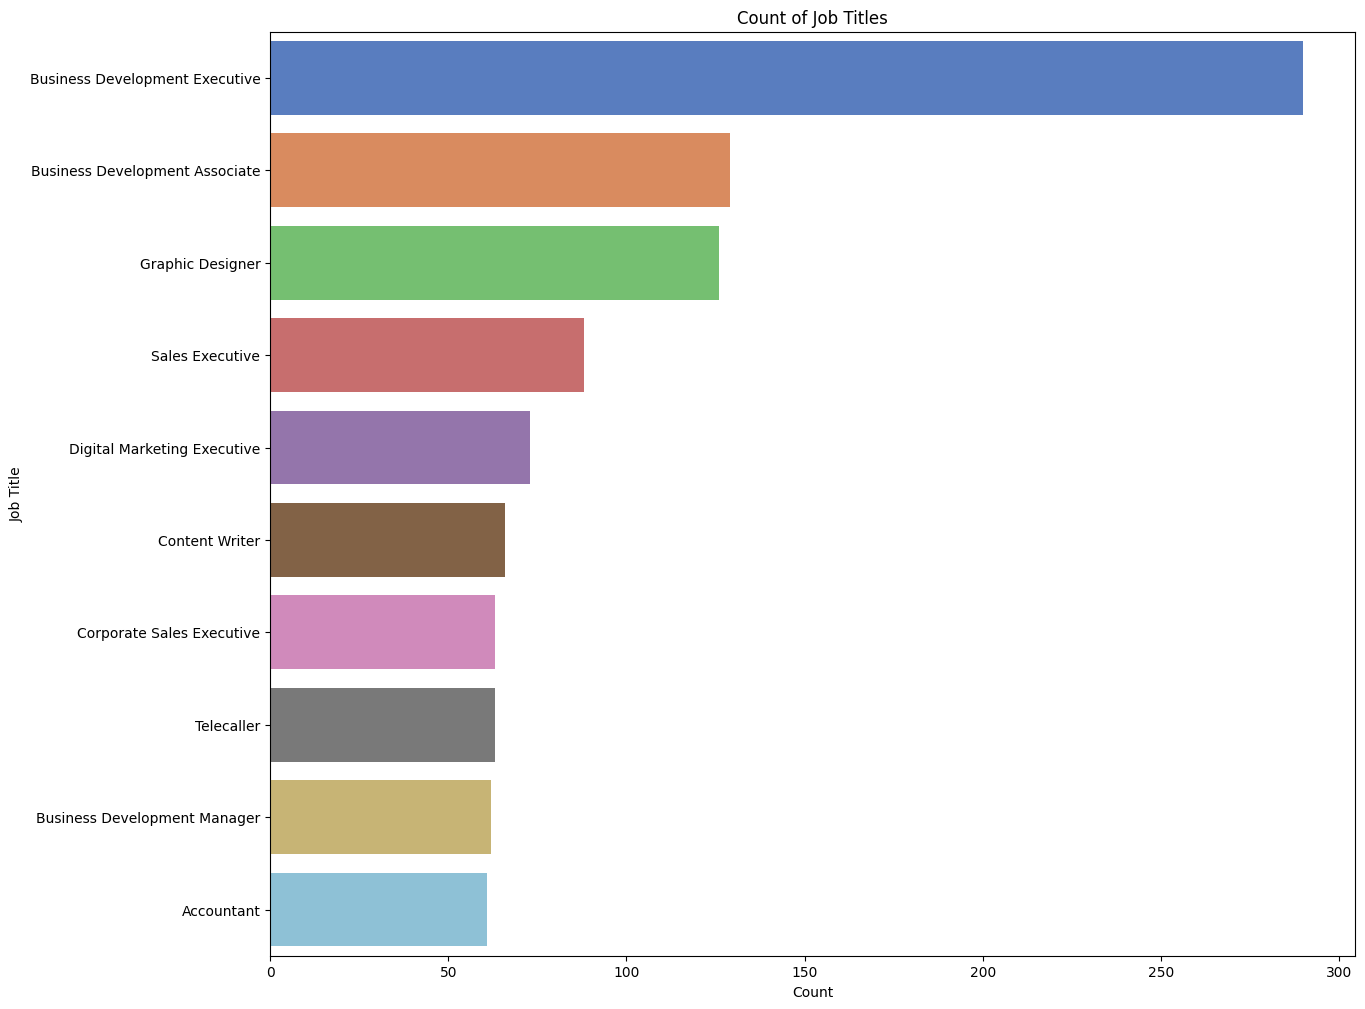

In [16]:
# Count of Job Titles
top_10_titles = df['job_title'].value_counts().head(10)
plt.figure(figsize=(14, 12))
sns.countplot(y='job_title', data=df, palette='muted', order=top_10_titles.index)
plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12640\1374142544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='min_ctc', y='job_title', data=df[:10], palette='Set2')


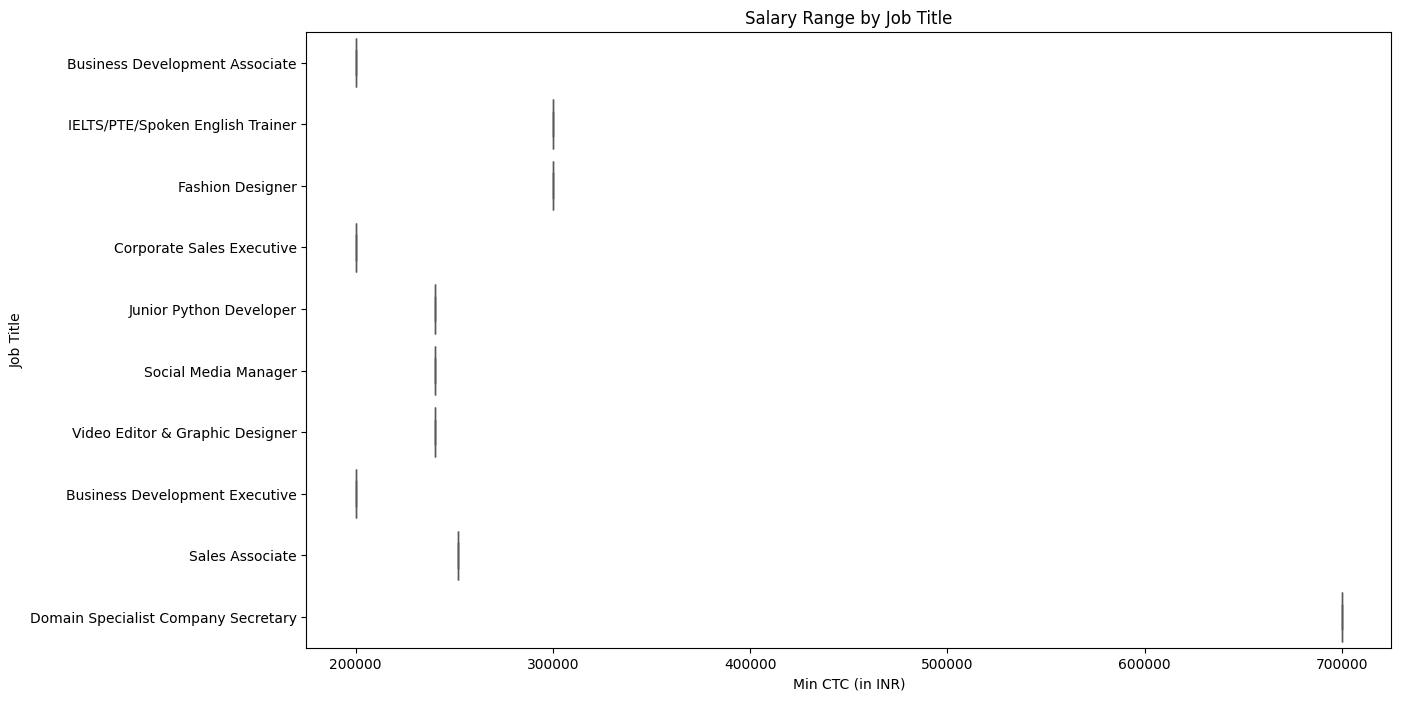

In [17]:
# Boxplot for Salary Range by Job Title
plt.figure(figsize=(14, 8))
sns.boxplot(x='min_ctc', y='job_title', data=df[:10], palette='Set2')
plt.title('Salary Range by Job Title')
plt.xlabel('Min CTC (in INR)')
plt.ylabel('Job Title')
plt.show()

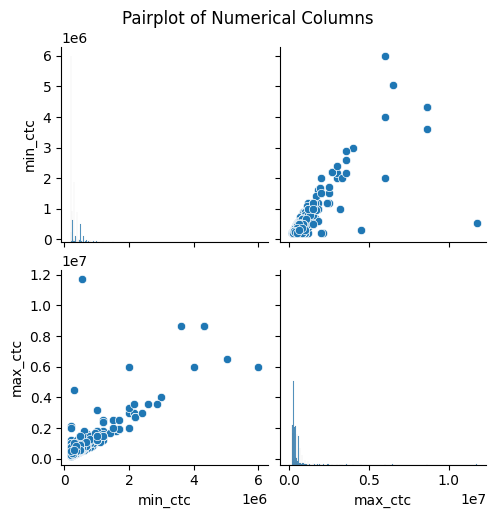

In [20]:
# Pairplot for numerical columns
sns.pairplot(df[['min_ctc', 'max_ctc', 'min_experience','max_experience']])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()